CDS 465 HW2

Name: Eric Wu

In [1]:
# do not delete; save for the professor for ease of grading
#mydir = '/home/jkinser/Documents/courses/CDSCardinal/Version4/' 
#mydir = '/Users/jkinser/Documents/CoursesKinser/CDSCardinal/Version3/'
mydir = '/Users/eric/Documents/CDS465/'
pysrc = mydir + 'pysrc/'
datadir = mydir + 'data/'
popdir = mydir + 'population/'

#%%
import numpy as np
import pandas as pd
import sqlite3 as sql
import sys
import imageio.v3 as iio
import matplotlib.pyplot as plt
import scipy
sys.path.append( pysrc )

## Task 1: Show the island

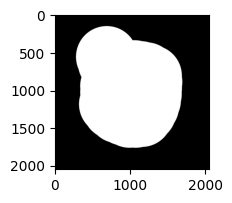

In [2]:
import Main
I = Main.Realm(datadir)

mat = I.isle['terrain']

plt.figure(figsize=(2,2))
plt.imshow(mat)
plt.imshow(mat,cmap='gray')

## Task 2: Percentage of pixels on the island

In [3]:
print(type(mat), mat.shape)


<class 'numpy.ndarray'> (2048, 2048)


In [4]:
n_zero = np.sum(mat!=0)
print(f'The percentage of pixels on the island is {(n_zero/2048**2)*100}')

The percentage of pixels on the island is 42.83933639526367


## Task 3

In [5]:
conn = sql.connect(datadir+'dnastats.db')

In [6]:
sql1 = 'select * from Data0D2S1338'

dna_df = pd.read_sql(sql = sql1, con = conn)

In [7]:
display(dna_df)

,did,allele,prob
0,1,16,0.041787
1,2,17,0.187330
2,3,18,0.101143
3,4,19,0.153087
4,5,20,0.121242
5,6,21,0.053583
6,7,22,0.066008
7,8,23,0.109890
8,9,24,0.086331
9,10,25,0.065648


## Task 4

In [8]:
I.ReadAll(popdir+'pop01.db')
len(I.persondf)

I.persondf.keys()

Index(['pid', 'birth', 'death', 'knowndeath', 'gender', 'firstname',
       'lastname', 'lifespan', 'health', 'nomad', 'coop', 'affair', 'biodad',
       'biomom', 'legaldad', 'legalmom', 'spouse', 'hoh', 'injail',
       'ismissing', 'pregstart', 'pregage', 'fertility', 'income', 'outgo',
       'savings', 'nstr', 'mtdna', 'ystr', 'recessive1', 'recessive2',
       'weight', 'height', 'fprint', 'dometh', 'e0', 'e1', 'e2', 'e3', 'e4',
       'e5', 'e6', 'e7', 'e8', 'e9', 'e10', 'e11', 'e12', 'e13', 'e14', 'e15',
       'violentcrime', 'nonviolentcrime', 'wisdom', 'virus1', 'sick1',
       'virus2', 'sick2', 'snp1', 'snp2', 'fun', 'polyr', 'polytheta',
       'meanness', 'erratic', 'education', 'skill', 'locv', 'loch'],
      dtype='object')

In [9]:
s1 = I.persondf['e0'] >= 0.75
lst = (I.persondf.loc[s1]['nstr'].str.split(';').str[9-1]).str.replace('(','').str.replace(')','').str.split(',').to_list() #apply string operations to the pd.Series then store it as a list
lst = [item for sublist in lst for item in sublist] # unpack list of lists
lst_len = len(lst) #store number of alleles == 2 * number of people per locus

from collections import Counter

lst = Counter(lst) #counter object
lst = sorted({item: count/lst_len for item, count in lst.items()}.items()) #sort counter
lst

[('16', 0.04),
 ('17', 0.198),
 ('18', 0.108),
 ('19', 0.134),
 ('20', 0.125),
 ('21', 0.044),
 ('22', 0.063),
 ('23', 0.113),
 ('24', 0.101),
 ('25', 0.062),
 ('26', 0.012)]

In [10]:
#I.persondf['nstr'].str.split(';').str[9-1]

In [ ]:
keep = ['firstname', 'lastname']

len(set(I.persondf[keep].str.))


2

In [21]:
len(I.persondf['firstname'].str.cat(I.persondf['lastname'], sep=' ').unique())

500